---
title: "reactivity"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
  pdf:
    include-in-header:
      - text: |
          \usepackage{bm}
          \usepackage{amsmath}
          \usepackage{unicode-math}
    latex-auto-install: true
---

## the simplest 2d dynamical system


\begin{align*}
\frac{dx_1}{dt} &= ax_1 + bx_2 \\
\frac{dx_2}{dt} &= cx_1 + dx_2
\end{align*}

...or in matrix form:

$$
\frac{d\mathbf{x}}{dt} = M \mathbf{x},
$$
where $\mathbf{x}=(x_1,x_2)$ and $M = \begin{pmatrix} a & b \\ c & d \end{pmatrix}$.


In [1]:
#| code-summary: "import stuff"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters
# %matplotlib widget

In [2]:
#| code-summary: "system of equations"

def system_equations(p, x, y):
    return [p['a'] * x + p['b'] * y,
            p['c'] * x + p['d'] * y,
           ]

# parameters as a dictionary
A1 = {'a': -1.0, 'b': +1.0,
      'c': +0.0, 'd': -2.0}
A2 = {'a': -1.0, 'b': +8,
      'c': +0.0, 'd': -2.0}

In [3]:
#| code-summary: "prepare streamplot and trajectories"

min_x, max_x = [-3, 3]
min_y, max_y = [-3, 3]
div = 50
X, Y = np.meshgrid(np.linspace(min_x, max_x, div),
                   np.linspace(min_y, max_y, div))

# given initial conditions (x0,y0), simulate the trajectory of the system as ivp
def simulate_trajectory(p, x0, y0, tmax=10, dt=0.01):
    t_eval = np.arange(0, tmax, dt)
    sol = solve_ivp(lambda t, y: system_equations(p, y[0], y[1]),
                    [0, tmax], [x0, y0], t_eval=t_eval)
    return sol

t1 = simulate_trajectory(A1, 0, 1, 100)
t2 = simulate_trajectory(A2, 0, 1, 100)

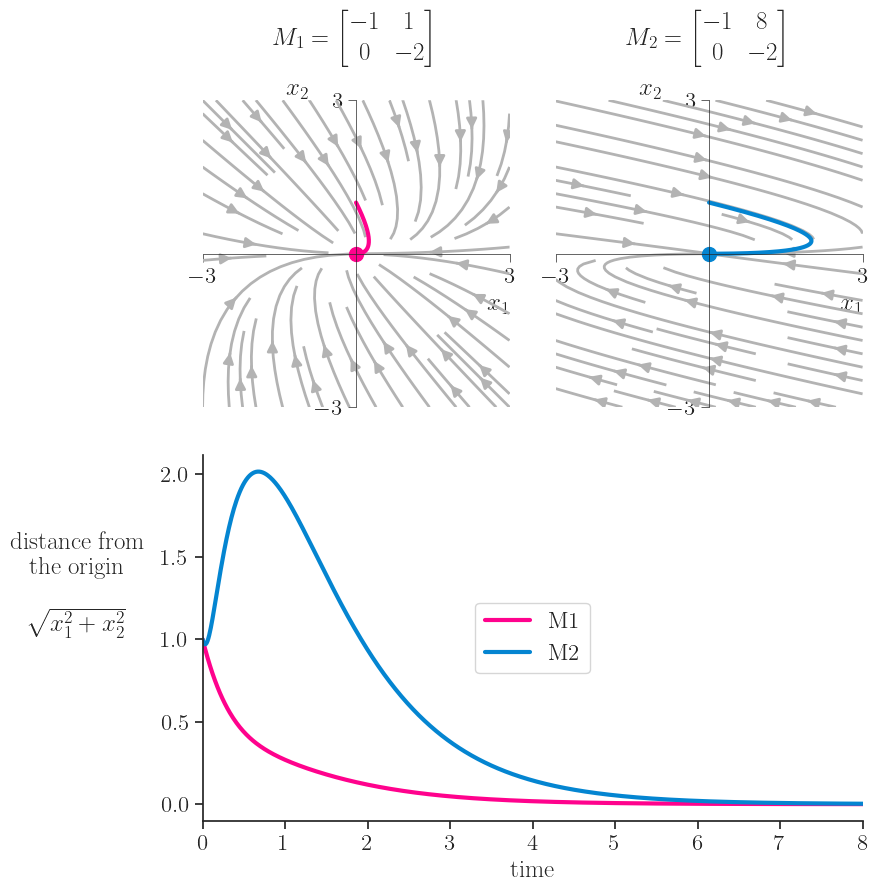

In [4]:
#| code-summary: "now let's plot"

# learn how to configure:
# http://matplotlib.sourceforge.net/users/customizing.html
params = {
          'font.family': 'serif',
          'ps.usedistiller': 'xpdf',
          'text.usetex': True,
          # include here any neede package for latex
          'text.latex.preamble': r'\usepackage{amsmath}',
          }
plt.rcParams.update(params)

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1])
gs.update(left=0.20, right=0.86,top=0.88, bottom=0.13, hspace=0.05, wspace=0.15)

ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, :])

density = 2 * [0.80]
minlength = 0.2
arrow_color = 3 * [0.7]
bright_color1 = "xkcd:hot pink"
bright_color2 = "xkcd:cerulean"

# make sure that each axes is square
ax0.set_aspect('equal', 'box')
ax1.set_aspect('equal', 'box')

ax0.streamplot(X, Y, system_equations(A1, X, Y)[0], system_equations(A1, X, Y)[1],
              density=density, color=arrow_color, arrowsize=1.5,
              linewidth=2,
              minlength=minlength
              )
ax1.streamplot(X, Y, system_equations(A2, X, Y)[0], system_equations(A2, X, Y)[1],
              density=density, color=arrow_color, arrowsize=1.5,
              linewidth=2,
              minlength=minlength
              )
ax0.plot(t1.y[0], t1.y[1], color=bright_color1, lw=3)
ax1.plot(t2.y[0], t2.y[1], color=bright_color2, lw=3)
ax0.plot(t1.y[0][-1], t1.y[1][-1], 'o', color=bright_color1, markersize=10)
ax1.plot(t2.y[0][-1], t2.y[1][-1], 'o', color=bright_color2, markersize=10)

# make spines at the origin, put arrow at the end of the axis
ax_list = [ax0, ax1]
for i in range(2):
    ax_list[i].spines['left'].set_position('zero')
    ax_list[i].spines['bottom'].set_position('zero')
    ax_list[i].spines['right'].set_color('none')
    ax_list[i].spines['top'].set_color('none')
    ax_list[i].spines['left'].set_linewidth(0.5)
    ax_list[i].spines['bottom'].set_linewidth(0.5)
    # ax_list[i].spines['right'].set_linewidth(0.5)
    # ax_list[i].spines['top'].set_linewidth(0.5)
    ax_list[i].xaxis.set_ticks_position('bottom')
    ax_list[i].yaxis.set_ticks_position('left')
    ax_list[i].xaxis.set_tick_params(width=0.5)
    ax_list[i].yaxis.set_tick_params(width=0.5)
ax0.set(xticks=[-3,3],
          yticks=[-3,3],
          xlim=[-3, 3],
          ylim=[-3, 3],)
ax1.set(xticks=[-3,3],
          yticks=[-3,3],
          xlim=[-3, 3],
          ylim=[-3, 3])

ax0.set_xlabel(r'$x_1$', loc='right')
ax0.set_ylabel(r'$x_2$', loc='top', rotation=0)
ax1.set_xlabel(r'$x_1$', loc='right')
ax1.set_ylabel(r'$x_2$', loc='top', rotation=0)


# put on title the respective parameters as matrix, use latex equation
# add pad to title to avoid overlap with x-axis

ax0.set_title(r'$M_1=\begin{bmatrix} -1 & 1 \\ 0 & -2 \end{bmatrix}$', pad=40)
ax1.set_title(r'$M_2=\begin{bmatrix} -1 & 8 \\ 0 & -2 \end{bmatrix}$', pad=40)

L2_one = np.sqrt(t1.y[0]**2 + t1.y[1]**2)
L2_two = np.sqrt(t2.y[0]**2 + t2.y[1]**2)

ax2.plot(t1.t, L2_one, color=bright_color1, lw=3, label='M1')
ax2.plot(t2.t, L2_two, color=bright_color2, lw=3, label='M2')
ax2.legend(loc='center')
ax2.set(xlim=[0,8],
        xlabel='time',)
ax2.set_ylabel('distance from\nthe origin\n\n' + r"$\sqrt{x_1^2+x_2^2}$", labelpad=60, rotation=0)
# only left and bottom spines
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

